In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from datetime import datetime
import plotly.graph_objects as go
import dates

## AdvisorShares Hotel ETF (BEDZ)
#### Top 10 Holdings (51.56% of Total Assets)

Name	| Symbol	| % Assets
|:--|--|--:|
Marriott International Inc Class A	| MAR	|5.76%
Booking Holdings Inc	| BKNG	| 5.68%
Ryman Hospitality Properties Inc	| RHP	| 5.51%
GreenTree Hospitality Group Ltd ADR	| GHG	| 5.20%
Bluegreen Vacations Holding Corp Class A	| BVH	| 5.14%
Airbnb Inc Ordinary Shares - Class A	| ABNB	| 4.99%
Boyd Gaming Corp	| BYD	| 4.93%
Royal Caribbean Group	| RCL	| 4.85%
Hyatt Hotels Corp Class A	| H	| 4.77%
Hilton Worldwide Holdings Inc	| HLT	| 4.74%

_Note:_ Dow Jones U.S. Hotels Index (^DJUSLG) does not have enough data available to be used 

## Hospitality Data Analysis

Name | Symbol
|----|-------|
HST | Host Hotels & Resorts Inc
HLT | Hilton Hotels Corporation
MAR | Marriott International Inc
CHH | Choice Hotels International Inc
H | Hyatt Hotels Corp
<!-- ABNB | Airbnb Inc -->

In [2]:
# Read Stocks CSV
stocks_hist = pd.read_csv("data/stocks.csv")
stocks_hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock,Sector,Capital Gains
0,2018-08-07 00:00:00-04:00,18.775549,18.775549,18.531936,18.601540,7584900,0.0,0.0,HST,hospitality,NaN
1,2018-08-08 00:00:00-04:00,18.671144,18.923458,17.809801,17.879404,12959400,0.0,0.0,HST,hospitality,NaN
2,2018-08-09 00:00:00-04:00,17.862002,17.966407,17.792399,17.827200,11420100,0.0,0.0,HST,hospitality,NaN
3,2018-08-10 00:00:00-04:00,17.757597,17.818500,17.522685,17.635792,8288300,0.0,0.0,HST,hospitality,NaN
4,2018-08-13 00:00:00-04:00,17.635792,17.740196,17.383479,17.487885,6328700,0.0,0.0,HST,hospitality,NaN
...,...,...,...,...,...,...,...,...,...,...,...
24133,2023-07-31 00:00:00-04:00,57.799999,58.160000,57.169998,57.299999,3445600,0.0,0.0,BUD,foodbev,NaN
24134,2023-08-01 00:00:00-04:00,57.150002,57.299999,56.529999,56.840000,3107200,0.0,0.0,BUD,foodbev,NaN
24135,2023-08-02 00:00:00-04:00,55.750000,56.320000,55.700001,56.230000,3449500,0.0,0.0,BUD,foodbev,NaN
24136,2023-08-03 00:00:00-04:00,57.459999,57.459999,56.509998,56.980000,4231600,0.0,0.0,BUD,foodbev,NaN


In [3]:
# convert csv read date string back to date
stocks_hist_date = stocks_hist.copy()
stocks_hist_date['Date'] = pd.to_datetime(stocks_hist['Date'])

### Closing Price over a 5-year period

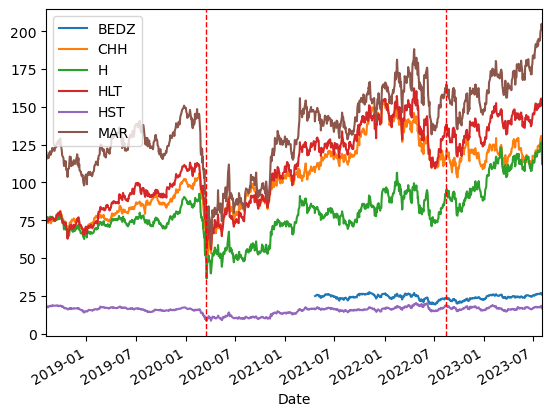

In [4]:
# Hospitality
hosp = stocks_hist_date.loc[stocks_hist_date["Sector"] == "hospitality"]
hosp_grp = hosp.groupby("Stock")
labels = hosp_grp.sum(numeric_only=True).index

hosp_grp.plot(kind="line", x="Date", y="Close", 
                                 legend=True, 
                                 xlim=[stocks_hist["Date"].min(), stocks_hist["Date"].max()],
                                 ax=plt.gca(),
                                 )
plt.legend(labels)
plt.axvline(pd.to_datetime(dates.covid_start), color='r', linestyle='--', linewidth='1')
plt.axvline(pd.to_datetime(dates.covid_end), color='r', linestyle='--', linewidth='1')
plt.show()

### Comparison of % Change over Periods

In [19]:
# get % change per stock

stock_grp = stocks_hist_date.groupby("Stock")
tickers = stock_grp.max().index

pcnt_change = {"Prior":[], "During":[], "Post":[], "Total":[]}

# Start/End dates should follow the import from dates.py, but the pull from Yahoo is not playing well with date formatting
covid_start = "2020-03-13 00:00:00-04:00"
covid_end = "2021-08-13 00:00:00-04:00"

for ticker in tickers:

    first_prior = stocks_hist_date.loc[(stocks_hist_date["Stock"] == ticker) &
                                (stocks_hist_date["Date"] == stocks_hist_date["Date"].min())]["Close"].max()  
    last_prior = stocks_hist_date.loc[(stocks_hist["Stock"] == ticker) &
                                (stocks_hist["Date"] == covid_start)]["Close"].max()
    pcnt_change["Prior"].append(100 * (last_prior - first_prior)/first_prior)
                                 
    
    first_during = stocks_hist_date.loc[(stocks_hist["Stock"] == ticker) &
                                (stocks_hist["Date"] == covid_start)]["Close"].max()
    last_during = stocks_hist_date.loc[(stocks_hist["Stock"] == ticker) &
                                (stocks_hist["Date"] == covid_end)]["Close"].max()
    pcnt_change["During"].append(100 * (last_during - first_during)/first_during)
                                 
                                 
    first_post = stocks_hist_date.loc[(stocks_hist_date["Stock"] == ticker) &
                                (stocks_hist["Date"] == covid_end)]["Close"].max()
    last_post = stocks_hist_date.loc[(stocks_hist_date["Stock"] == ticker) &
                                (stocks_hist_date["Date"] == stocks_hist_date["Date"].max())]["Close"].max()
    pcnt_change["Post"].append(100 * (last_post - first_post)/first_post)


    first_tot = stocks_hist_date.loc[(stocks_hist_date["Stock"] == ticker) &
                                (stocks_hist_date["Date"] == stocks_hist_date["Date"].min())]["Close"].max()  
    last_tot = stocks_hist_date.loc[(stocks_hist_date["Stock"] == ticker) &
                                (stocks_hist_date["Date"] == stocks_hist_date["Date"].max())]["Close"].max()
    pcnt_change["Total"].append(100 * (last_tot - first_tot)/first_tot)


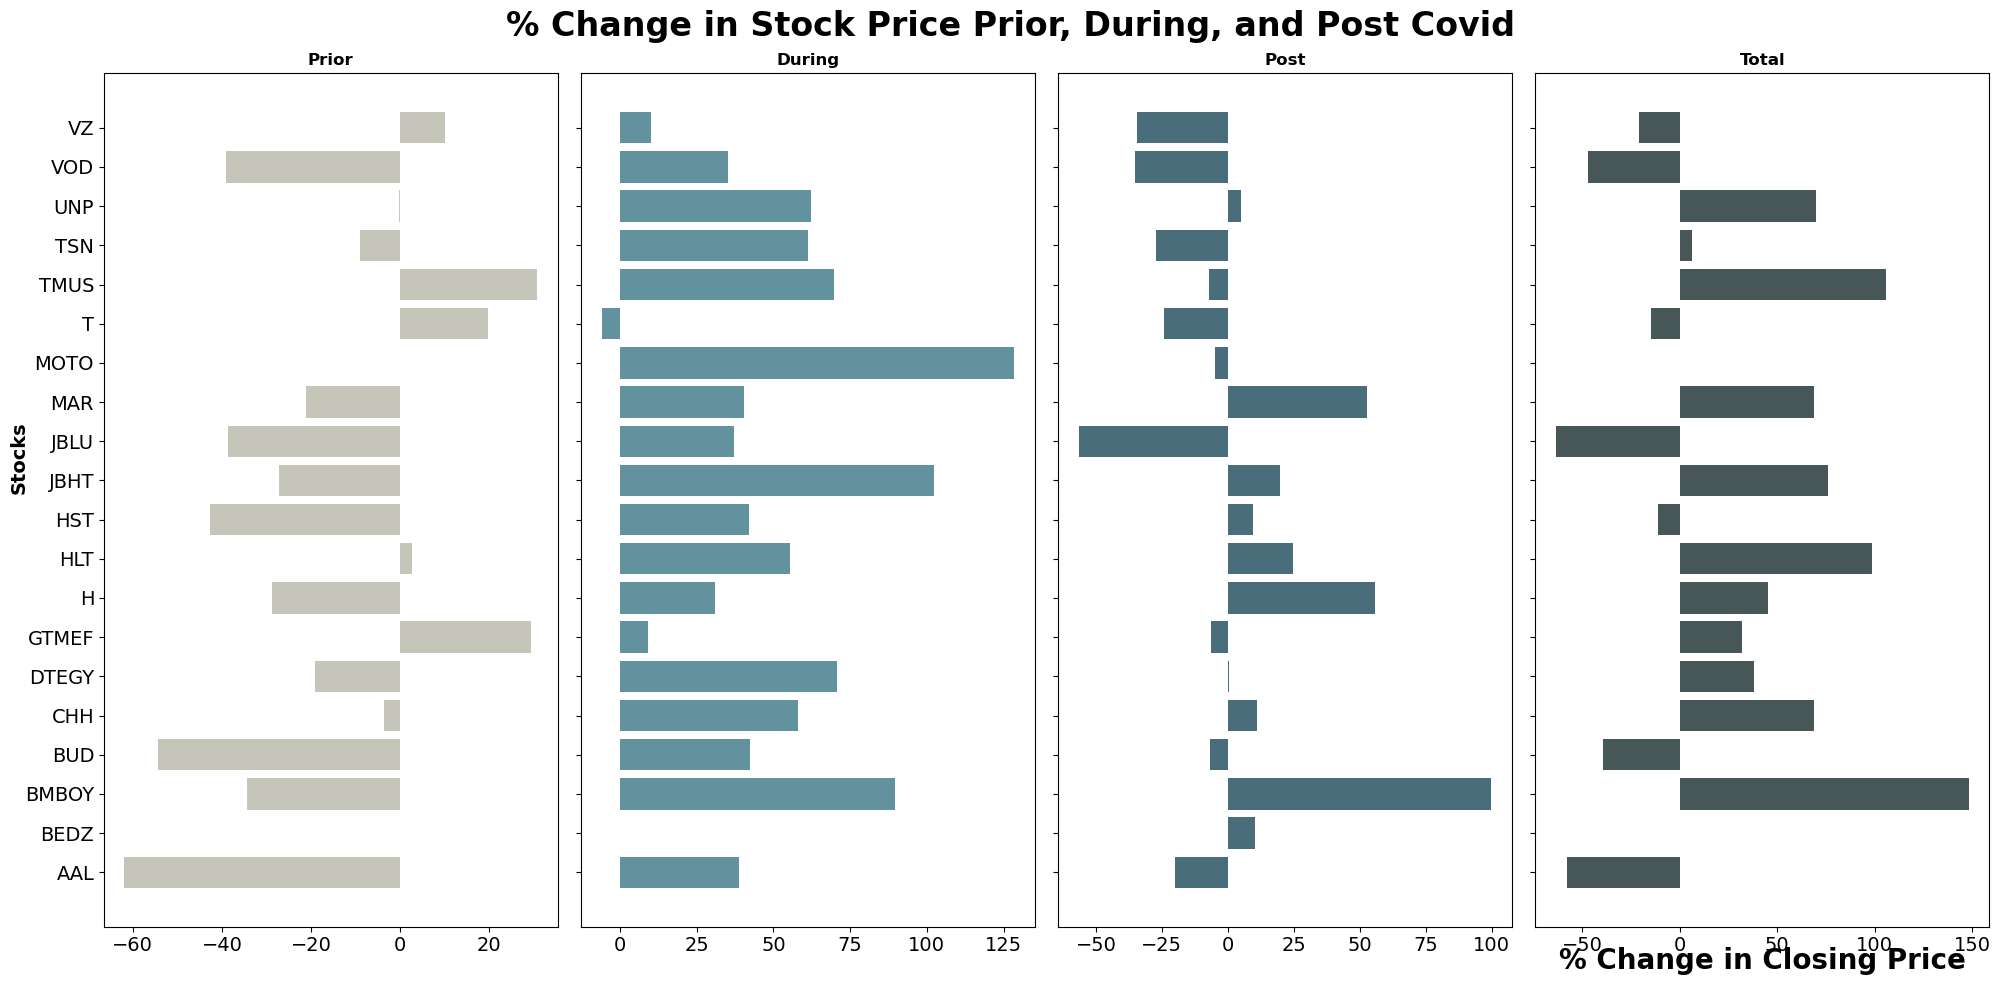

In [16]:
colors = ["#C6C5B9", "#62929E", '#4A6D7C', '#475657']

fig, axes = plt.subplots(1,4, figsize=(20, 10),sharey=True)

for i, j in enumerate(pcnt_change.keys()):
    ax = axes[i]    
    ax.barh(tickers, pcnt_change[j], color=colors[i])
    ax.set_title(j, fontweight ="bold")
    
    ## Supposed to put mean line on each axes, but not working yet
    #
    # mean = np.average(pcnt_change[j])
    # line = lines.Line2D([mean,-1],
    #                 [mean, 20],
    #                 lw = 2, color ='green', alpha = 0.7)
    # ax.add_line(line)

    
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.xlabel("% Change in Closing Price", fontweight="bold", fontsize=20, ha="center", va="center")
# plt.ylabel("Indices / ETFs / Stocks", fontweight="bold", fontsize=20, ha="center", va="center")
fig.text(0,0.5, "Stocks", rotation=90, fontweight ="bold", fontsize=14)
fig.suptitle("% Change in Stock Price Prior, During, and Post Covid", fontweight ="bold", fontsize=24)
fig.tight_layout()

plt.show()
# adapted from "Analyzing World Stock Indices Performances with Python"
# https://towardsdatascience.com/analyzing-world-stock-indices-performance-in-python-610df6a578f

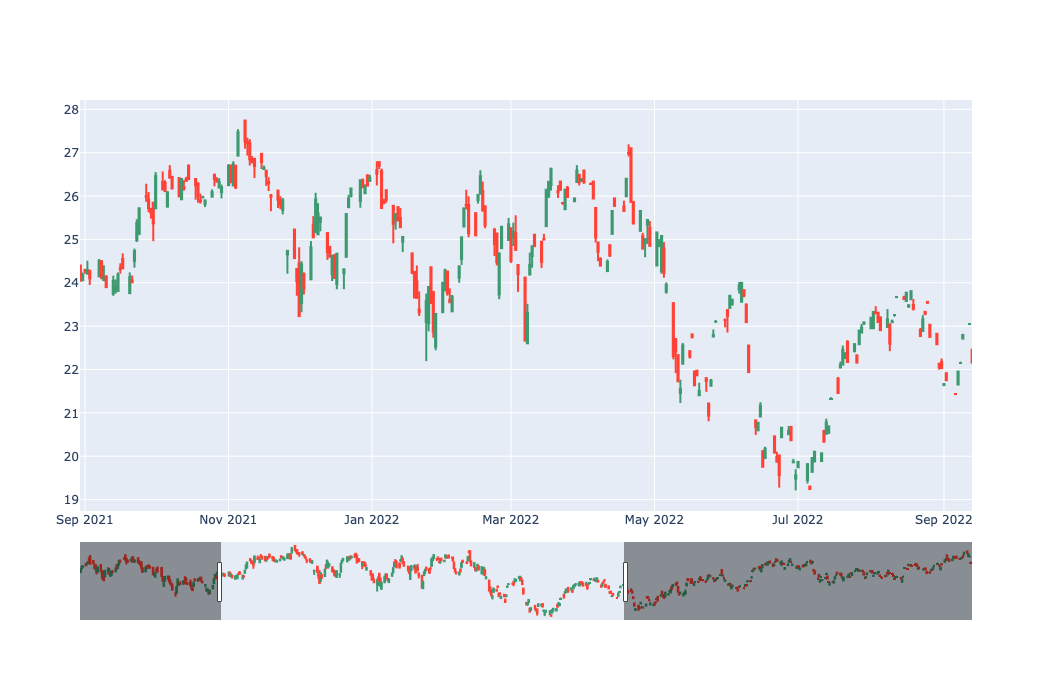

In [38]:
### Candle Plot
BEDZ = stocks_hist_date.loc[stocks_hist_date["Stock"] == "BEDZ"]
fig2 = go.Figure(data=[go.Candlestick(x=BEDZ['Date'],
                open=BEDZ['Open'],
                high=BEDZ['High'],
                low=BEDZ['Low'],
                close=BEDZ['Close'])],
                layout=go.Layout(autosize=True, height=700))

fig2.show()

### Histogram of Percent Change Open to Close, per 

Stock
CHH    Axes(0.1,0.15;0.8x0.75)
H      Axes(0.1,0.15;0.8x0.75)
HLT    Axes(0.1,0.15;0.8x0.75)
HST    Axes(0.1,0.15;0.8x0.75)
MAR    Axes(0.1,0.15;0.8x0.75)
dtype: object

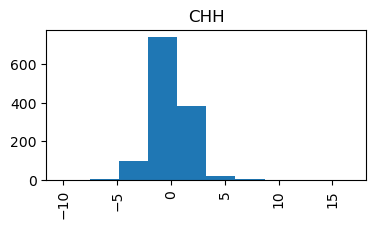

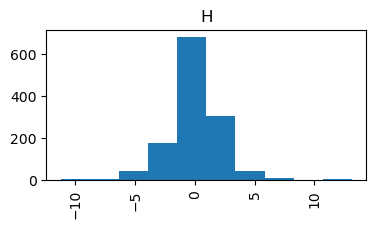

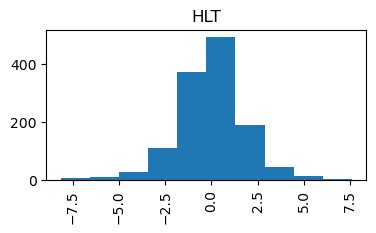

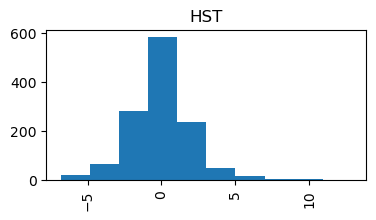

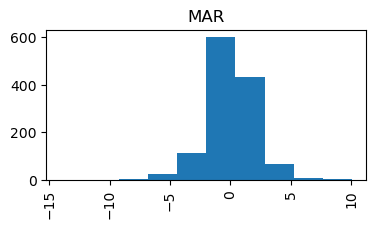

In [33]:
### % change no longer in data set

## Do Not Run
stocks_grp.hist(by="Stock", sharex=True, column="% change", figsize=[4,2])